In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [ ]:
df=pd.read_csv('/content/tsla_2025.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Volume
0,2010-06-28,1.13333,1.13333,1.13333,1.13333,0
1,2010-06-29,1.26667,1.66667,1.16933,1.59267,281749140
2,2010-06-30,1.71933,2.02800,1.55333,1.58867,257915910
3,2010-07-01,1.66667,1.72800,1.35133,1.46400,123447945
4,2010-07-02,1.53333,1.54000,1.24733,1.28000,77127105
...,...,...,...,...,...,...
3658,2025-01-13,383.21000,403.79000,380.07000,403.31000,67580494
3659,2025-01-14,414.34000,422.64000,394.54000,396.36000,84565022
3660,2025-01-15,409.90000,429.80000,405.66100,428.22000,81375460
3661,2025-01-16,423.49000,424.00000,409.13000,413.82000,68335151


In [ ]:
training_set = df.iloc[:3000, 1:2].values
test_set = df.iloc[3000:, 1:2].values

In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set = df.iloc[:3000, 1:2].values # training set
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)): # Adjusted the range based on the  training_set length
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1) # Note: The shape will change after this correction

In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - loss: 0.0098
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0015
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0015
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0015
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0015
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0013
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0014
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0014
Epoch 9/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0011
Epoch 10/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0011
Epoch 11/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0014
Epoch 12/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0012
Epoch 13/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0011
Epoch 14/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0010
Epoch 15/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - l

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


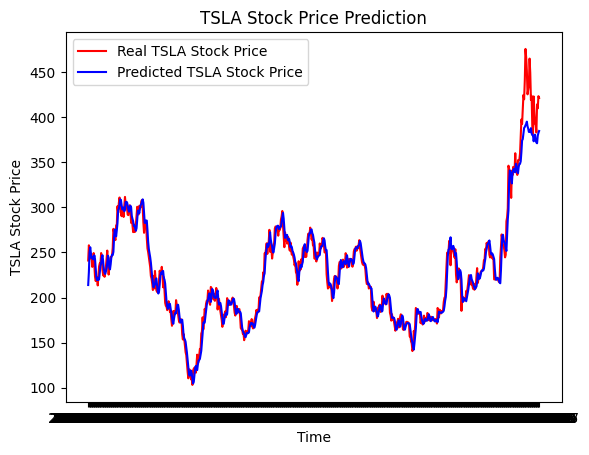

In [ ]:
# Getting the predicted stock price
dataset_train = df.iloc[:3000, 1:2]
dataset_test = df.iloc[3000:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(dataset_test) + 60):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(df.iloc[3000:, 0], test_set, color = 'red', label = 'Real TSLA Stock Price')
plt.plot(df.iloc[3000:, 0], predicted_stock_price, color = 'blue', label = 'Predicted TSLA Stock Price')
plt.title('TSLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TSLA Stock Price')
plt.legend()
plt.show()